In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [3]:
unprunedAndImputedData = pd.read_csv('C:/Users/Kiruthika Velusamy/Downloads/Unprunued and Imputed_Training data.csv')
prunedData = pd.read_csv('C:/Users/Kiruthika Velusamy/Downloads/Final_dataset.csv')
testData = pd.read_csv('C:/Users/Kiruthika Velusamy/Downloads/Final_dataset_test.csv')

In [4]:
len(unprunedAndImputedData)

33849

In [5]:
def str_to_numeric(data1):
    label_mapping = {}
    char_cols = data1.dtypes.pipe(lambda x: x[x == 'object']).index
    for c in char_cols:
       data1[c], label_mapping[c] = pd.factorize(data1[c])
    return data1

In [6]:
unprunedAndImputedDataNumeric = str_to_numeric(unprunedAndImputedData)
prunedDataNumeric = str_to_numeric(prunedData)
testDataNumeric = str_to_numeric(testData)

In [7]:
len(unprunedAndImputedDataNumeric)

33849

In [24]:
len(prunedDataNumeric)

28619

In [8]:
len(testDataNumeric)

7339

In [9]:

from sklearn.svm import SVC

X = unprunedAndImputedDataNumeric.drop(unprunedAndImputedDataNumeric.columns[0],axis=1).drop(['id','y','duration','nr.employed','default'],axis=1)
Y = unprunedAndImputedDataNumeric['y']
# clf = svm.SVC(kernel='linear',degree=1)
clf = SVC(gamma='auto')
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [10]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score
kf = KFold(len(Y), n_folds=10)
# clf = svm.SVC(kernel='linear',degree=1)
clf = SVC(gamma='auto')
for train_index, test_index in kf:
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   returned= confusion_matrix(y_test, y_pred).ravel()
   len(returned)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
   specificity = tn / (tn+fp) 
   print("specificity = ",specificity) 
   print("precision = ",precision_score(y_test, y_pred))
   print("recall = ",recall_score(y_test, y_pred))
   print("f1 score = ",f1_score(y_test, y_pred)) 
   print(confusion_matrix(y_test, y_pred))
    

specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3300    0]
 [  85    0]]


C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3259    0]
 [ 126    0]]
specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3241    0]
 [ 144    0]]
specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3156    0]
 [ 229    0]]
specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3161    0]
 [ 224    0]]
specificity =  1.0
precision =  0.0
recall =  0.0
f1 score =  0.0
[[3221    0]
 [ 164    0]]
specificity =  0.9798013245033113
precision =  0.26506024096385544
recall =  0.06027397260273973
f1 score =  0.0982142857142857
[[2959   61]
 [ 343   22]]
specificity =  0.9959919839679359
precision =  0.29411764705882354
recall =  0.01278772378516624
f1 score =  0.024509803921568627
[[2982   12]
 [ 386    5]]
specificity =  0.96671388101983
precision =  0.38562091503267976
recall =  0.1051693404634581
f1 score =  0.165266106442577
[[2730   94]
 [ 502   59]]
specificity =  0.9858233369683751
precision =  0.5737704918032787
recall

In [13]:
# metrics for train data set
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score,log_loss
clf = SVC(gamma='auto',probability=True)
clf.fit(X,Y)
pred = clf.predict(testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1))
y_pred = pd.Series(pred, name="predicted")
y_actual = pd.Series(testDataNumeric['y'], name="actual")
print(pd.crosstab(y_pred,y_actual))

tn, fp, fn, tp = confusion_matrix(y_pred,y_actual).ravel()
specificity = tn / (tn+fp) 
print("specificity = ",specificity) 
print("precision = ",precision_score(y_actual, y_pred))
print("recall = ",recall_score(y_actual, y_pred))
print("f1 score = ",f1_score(y_actual, y_pred))
print("log loss = ",log_loss(y_actual, y_pred))
print(confusion_matrix(y_test, y_pred))


actual        0    1
predicted           
0          6463  653
1            46  177
specificity =  0.9082349634626194
precision =  0.7937219730941704
recall =  0.21325301204819277
f1 score =  0.3361823361823362
log loss =  3.289636392086709


In [ ]:
# metrics for test data set
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score,log_loss
clf = SVC(gamma='auto',probability=True)
clf.fit(X_test,y_test)
pred = clf.predict(testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1))
y_pred = pd.Series(pred, name="predicted")
y_actual = pd.Series(testDataNumeric['y'], name="actual")
print(pd.crosstab(y_pred,y_actual))

tn, fp, fn, tp = confusion_matrix(y_pred,y_actual).ravel()
specificity = tn / (tn+fp) 
print("specificity = ",specificity) 
print("precision = ",precision_score(y_actual, y_pred))
print("recall = ",recall_score(y_actual, y_pred))
print("f1 score = ",f1_score(y_actual, y_pred))
print("log loss = ",log_loss(y_actual, y_pred))


In [29]:
len(X),len(Y)

(28619, 28619)

In [16]:
pred = clf.predict(
            testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1),
           )

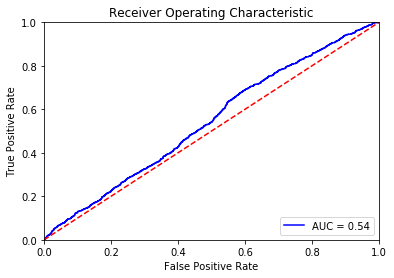

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score

from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve
clf = SVC(gamma='auto',probability=True)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
clf.score(testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1),np.array(testDataNumeric['y']))

0.8881318980787574

In [41]:
pred = clf.predict(testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1))

In [21]:
y_pred = pd.Series(pred, name="predicted")
y_actual = pd.Series(testData['y'], name="actual")
pd.crosstab(y_pred,y_actual)

actual,0,1
predicted,,
0,6505,817
1,4,13


In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, unprunedAndImputedDataNumeric.drop(unprunedAndImputedDataNumeric.columns[0],axis=1).drop(['id','y','duration','nr.employed','default'],axis=1),
                           unprunedAndImputedDataNumeric['y'], cv=5)
conf_mat = confusion_matrix(unprunedAndImputedDataNumeric['y'], y_pred)

In [23]:
from sklearn.svm import SVC
X = prunedDataNumeric.drop(prunedDataNumeric.columns[0],axis=1).drop(['id','y','default','outliers'],axis=1)
Y = prunedDataNumeric['y']
clf = SVC(gamma='auto')
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix
kf = KFold(len(Y), n_folds=10)

# clf = svm.SVC(kernel='linear',degree=1)
clf = SVC(gamma='auto')
for train_index, test_index in kf:
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
   clf.fit(X_train, y_train)
   y_pred = clf.predict(X_test)
   returned= confusion_matrix(y_test, y_pred).ravel()
   len(returned)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
   specificity = tn / (tn+fp) 
   print("specificity = ",specificity) 
   print("precision = ",precision_score(y_test, y_pred))
   print("f1 score = ",f1_score(y_test, y_pred)) 
   print("recall = ",recall_score(y_test, y_pred))
   print(confusion_matrix(y_test, y_pred))

specificity =  0.9819466248037677
precision =  0.6290322580645161
f1 score =  0.3561643835616438
recall =  0.2484076433121019
[[2502   46]
 [ 236   78]]
specificity =  0.9862798902391219
precision =  0.6698113207547169
f1 score =  0.34052757793764993
recall =  0.2282958199356913
[[2516   35]
 [ 240   71]]
specificity =  0.9863441279750292
precision =  0.6195652173913043
f1 score =  0.2915601023017903
recall =  0.19063545150501673
[[2528   35]
 [ 242   57]]
specificity =  0.988976377952756
precision =  0.6853932584269663
f1 score =  0.29683698296836986
recall =  0.18944099378881987
[[2512   28]
 [ 261   61]]
specificity =  0.9828192112456072
precision =  0.65625
f1 score =  0.39160839160839156
recall =  0.27906976744186046
[[2517   44]
 [ 217   84]]
specificity =  0.9812792511700468
precision =  0.5862068965517241
f1 score =  0.3285024154589372
recall =  0.22818791946308725
[[2516   48]
 [ 230   68]]
specificity =  0.9778812572759022
precision =  0.5086206896551724
f1 score =  0.2942643

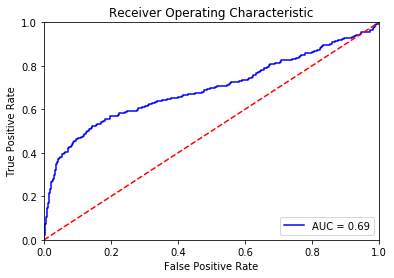

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score

from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix,auc,roc_curve
clf = SVC(gamma='auto',probability=True)
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import confusion_matrix,recall_score,log_loss
clf = SVC(gamma='auto',probability=True)
clf.fit(X,Y)
pred = clf.predict(testDataNumeric.drop(testDataNumeric.columns[0],axis=1).drop(['id','y','default'],axis=1))
y_pred = pd.Series(pred, name="predicted")
y_actual = pd.Series(testDataNumeric['y'], name="actual")
print(pd.crosstab(y_pred,y_actual))

tn, fp, fn, tp = confusion_matrix(y_pred,y_actual).ravel()
specificity = tn / (tn+fp) 
print("specificity = ",specificity) 
print("precision = ",precision_score(y_actual, y_pred))
print("recall = ",recall_score(y_actual, y_pred))
print("f1 score = ",f1_score(y_actual, y_pred))
print("log loss = ",log_loss(y_actual, y_pred))

actual        0    1
predicted           
0          6445  690
1            64  140
specificity =  0.9032936229852838
precision =  0.6862745098039216
recall =  0.1686746987951807
f1 score =  0.27079303675048355
log loss =  3.548479162828477
